In [ ]:
import os

# Define the paths
DATA_PATH = '/content/drive/MyDrive/chest_xray'
TRAIN_PATH = os.path.join(DATA_PATH, 'train')
VAL_PATH = os.path.join(DATA_PATH, 'val')

# Create the directories if they don't exist
os.makedirs(TRAIN_PATH, exist_ok=True)
os.makedirs(VAL_PATH, exist_ok=True)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: Mountpoint must not already contain files

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

import tensorflow as tf  # Import TensorFlow explicitly
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img  # Use tensorflow.keras

In [ ]:
import os
mainDIR = os.listdir('/content/drive/MyDrive/chest_xray')
print(mainDIR)

['train', 'val']


In [ ]:
train_folder=  "/content/drive/MyDrive/chest_xray/train"
val_folder =  os.listdir('/content/drive/MyDrive/chest_xray/val')
test_folder =  os.listdir('/content/drive/MyDrive/chest_xray/val')

# train
os.listdir(train_folder)
train_n = train_folder+'/NORMAL'
train_p = train_folder+'/PNEUMONIA'


In [ ]:
#Normal pic
print(len(os.listdir(train_n))) #will print the total no of files in the directory
rand_norm= np.random.randint(0,len(os.listdir(train_n))) #random sampling returns an array of shape.
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)
norm_pic_address = train_n+'/'+norm_pic

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/chest_xray/train/NORMAL'

In [ ]:
#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+'/'+sic_pic
print('pneumonia picture title:', sic_pic)

pneumonia picture title: person1406_virus_2409.jpeg


In [ ]:
# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

Text(0.5, 1.0, 'Normal')

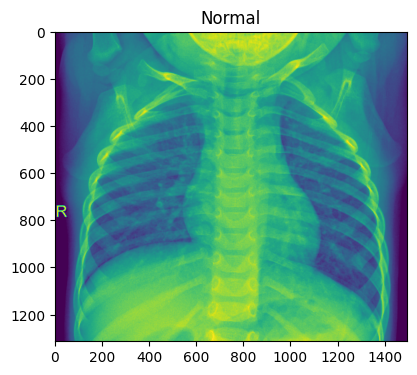

In [ ]:
 #split these images
f = plt.figure(figsize= (10,6)) #10 width and 6 height
a1 = f.add_subplot(1,2,1) #(height, width, plot number.)as paramenter divides fig into objects
img_plot = plt.imshow(norm_load)  #imshow() creates an image from a 2-dimensional numpy array
a1.set_title('Normal')

Text(0.5, 1.0, 'Pneumonia')

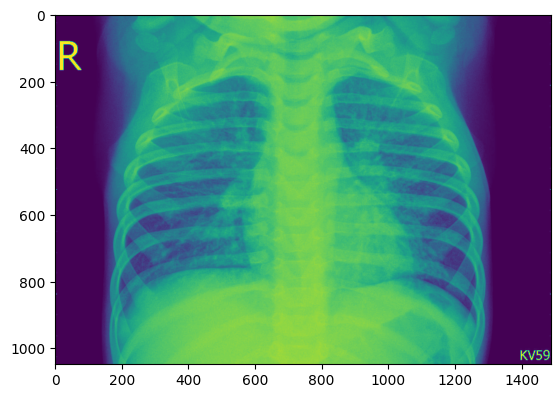

In [ ]:
a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

In [ ]:
# the CNN model

cnn = Sequential()
#add() to add layers to cnn.
#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))
#Flatten serves as a connection between the convolution and dense layers.
# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))
#The optimizer controls the learning rate.
#The learning rate determines how fast the optimal weights for the model are calculated.
# Compile the Neural network
# ‘accuracy’ metric to see the accuracy score on the validation set when we train the model.
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is
#getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train/',target_size = (64, 64),batch_size = 32,class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/val/',target_size=(64, 64),batch_size=32,class_mode='binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test/',target_size = (64, 64), batch_size = 32,class_mode = 'binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Use the fit method
cnn_model = cnn.fit(training_set,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=20)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 180s 5s/step - accuracy: 0.7185 - loss: 0.5388 - val_accuracy: 0.6250 - val_loss: 0.7785
Epoch 2/5
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7812 - loss: 0.4408

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.8395 - loss: 0.3651 - val_accuracy: 0.6250 - val_loss: 0.6175
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.8750 - loss: 0.2976 - val_accuracy: 0.8750 - val_loss: 0.3114
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.8843 - loss: 0.2627 - val_accuracy: 0.6250 - val_loss: 0.7236
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.8455 - loss: 0.3356 - val_accuracy: 0.8750 - val_loss: 0.3690


20/20 ━━━━━━━━━━━━━━━━━━━━ 406s 21s/step - accuracy: 0.7972 - loss: 0.4110
The testing accuracy is : 82.53205418586731 %


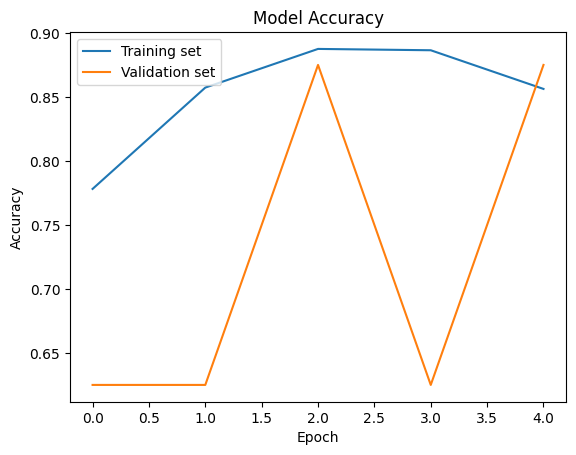

In [ ]:
test_accu = cnn.evaluate(test_set,steps=20)
acc=test_accu[1]*10
print('The testing accuracy is :', test_accu[1]*100 ,'%')
# Accuracy
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


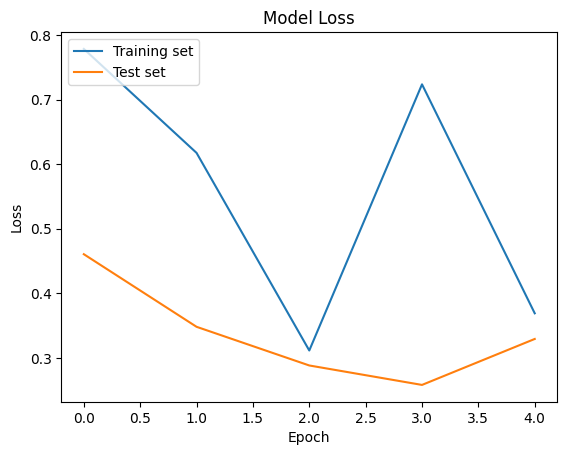

In [ ]:
# Loss

plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

# **Hyperparameter Tuning**

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD

# Define the reduced hyperparameter ranges
batch_sizes = [32, 64]  # Higher batch sizes for faster training
epochs = [2, 5]  # Fewer epochs for faster training
learning_rates = [0.05, 0.1]  # Slightly higher learning rates for faster convergence
momentums = [0.9]  # Stick with a higher momentum for faster convergence
dropouts = [0.2, 0.5]  # Regularization options remain unchanged

# Define the model architecture
input_layer = Input(shape=(64, 64, 1))
x = Conv2D(32, (3, 3), activation="relu")(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3, 3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(activation='relu', units=128)(x)
x = Dropout(rate=0.5)(x)  # Added dropout for regularization
x = Dense(activation='sigmoid', units=1)(x)

cnn = Model(inputs=input_layer, outputs=x)

# Define the training loop
for batch_size in batch_sizes:
    for epoch in epochs:
        for learning_rate in learning_rates:
            for momentum in momentums:
                for dropout in dropouts:
                    # Compile the model with the current hyperparameters
                    cnn.compile(optimizer=SGD(learning_rate=learning_rate, momentum=momentum), loss='binary_crossentropy', metrics=['accuracy'])

                    # Train the model
                    history = cnn.fit(training_set,
                                      steps_per_epoch=len(training_set) // batch_size,  # Dynamic step calculation
                                      epochs=epoch,
                                      validation_data=validation_generator,
                                      validation_steps=20)

                    # Evaluate the model
                    loss, accuracy = cnn.evaluate(test_set)
                    print(f"Batch size: {batch_size}, Epochs: {epoch}, Learning rate: {learning_rate}, Momentum: {momentum}, Dropout: {dropout}, Loss: {loss:.3f}, Accuracy: {accuracy:.3f}")


Epoch 1/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 700ms/step - accuracy: 0.5043 - loss: 0.7139 - val_accuracy: 0.5000 - val_loss: 0.7063
Epoch 2/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 923ms/step - accuracy: 0.7945 - loss: 0.5931 - val_accuracy: 0.5000 - val_loss: 0.8343
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 257ms/step - accuracy: 0.6452 - loss: 0.6814
Batch size: 32, Epochs: 2, Learning rate: 0.05, Momentum: 0.9, Dropout: 0.2, Loss: 0.701, Accuracy: 0.625
Epoch 1/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 911ms/step - accuracy: 0.7560 - loss: 0.5730 - val_accuracy: 0.5000 - val_loss: 0.8946
Epoch 2/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7210 - loss: 0.6046 - val_accuracy: 0.5000 - val_loss: 0.8915
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 250ms/step - accuracy: 0.6129 - loss: 0.7387
Batch size: 32, Epochs: 2, Learning rate: 0.05, Momentum: 0.9, Dropout: 0.5, Loss: 0.724, Accuracy: 0.625
Epoch 1/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 652ms/step - accuracy: 0.7063 - loss: 0.6614 - val_accuracy: 0.5000 - val_loss: 0.7425
Epoch 2/2
5/5

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD

# Define the model architecture
input_layer = Input(shape=(64, 64, 1))
x = Conv2D(32, (3, 3), activation="relu")(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3, 3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(activation='relu', units=128)(x)
x = Dropout(rate=0.5)(x)  # Dropout layer for regularization
x = Dense(activation='sigmoid', units=1)(x)

cnn = Model(inputs=input_layer, outputs=x)

# Compile the model with the fixed hyperparameters
cnn.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with specified parameters
history = cnn.fit(training_set,
                  steps_per_epoch=len(training_set) // 16,  # Batch size set to 16
                  epochs=10,  # Train for 10 epochs
                  validation_data=validation_generator,
                  validation_steps=20)

# Evaluate the model
loss, accuracy = cnn.evaluate(test_set)
print(f"Test Loss: {loss:.3f}, Test Accuracy: {accuracy:.3f}")


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 380ms/step - accuracy: 0.4618 - loss: 0.6973 - val_accuracy: 0.5000 - val_loss: 0.7015
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 434ms/step - accuracy: 0.7491 - loss: 0.6424 - val_accuracy: 0.5000 - val_loss: 0.7405
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 560ms/step - accuracy: 0.7249 - loss: 0.6039 - val_accuracy: 0.5000 - val_loss: 0.8337
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 415ms/step - accuracy: 0.6943 - loss: 0.6257 - val_accuracy: 0.5000 - val_loss: 0.8633
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 396ms/step - accuracy: 0.7495 - loss: 0.5640 - val_accuracy: 0.5000 - val_loss: 0.8032
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 347ms/step - accuracy: 0.7651 - loss: 0.5507 - val_accuracy: 0.5000 - val_loss: 0.7901
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 434ms/step - accuracy: 0.7387 - loss: 0.5824 - val_accuracy: 0.5000 - val_loss: 0.8099
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 355ms/step - accuracy: 0.7286 - loss: 0.5920 - val_accuracy: 0.

In [ ]:
# Save the model using the native Keras format
cnn.save('my_model.keras')


Pickle file

In [ ]:
import pickle

# Save the model
with open('cnn_model.pkl', 'wb') as f:
    pickle.dump(cnn_model, f)

# Load the model
with open('cnn_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
!pip install streamlit keras pillow



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 120.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
import streamlit as st
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import numpy as np

# Title and description
st.title("Image Classification with Keras")
st.write("Upload an image to classify it using your trained model.")

# Load your pre-trained model
@st.cache_resource  # Cache the model to avoid reloading it on every run
def load_trained_model():
    model = load_model("/content/my_model.keras")  # Replace with your model's path
    return model

model = load_trained_model()

# Image preprocessing function
def preprocess_image(image):
    image = image.resize((64, 64))  # Resize the image to the input shape expected by your model
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0  # Normalize the image
    return image

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)
    st.write("")
    st.write("Classifying...")

    # Preprocess the image
    processed_image = preprocess_image(image)

    # Make predictions
    prediction = model.predict(processed_image)

    # Display the result
    if prediction[0] > 0.5:
        st.write("The model predicts: **Class 1**")
    else:
        st.write("The model predicts: **Class 0**")


In [ ]:
!pip install Flask


In [ ]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import io
import os
from google.colab import drive

app = Flask(__name__)

# Mount Google Drive and load the model
model_path = '/content/drive/MyDrive/my_model.keras'
model = load_model(model_path)

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file provided'}), 400

    file = request.files['file']
    image = Image.open(file)
    image_array = np.array(image.resize((64, 64))) / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    prediction = model.predict(image_array)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=8080)


 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 8080 is in use by another program. Either identify and stop that program, or start the server with a different port.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/serving.py", line 750, in __init__
    self.server_bind()
  File "/usr/lib/python3.10/http/server.py", line 137, in server_bind
    socketserver.TCPServer.server_bind(self)
  File "/usr/lib/python3.10/socketserver.py", line 466, in server_bind
    self.socket.bind(self.server_address)
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-002baf5734ff>", line 28, in <cell line: 27>
    app.run(host='0.0.0.0', port=8080)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1191, in run
    run_simple(t.cast(str, host), port, self, **options)
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/serving.py

TypeError: object of type 'NoneType' has no len()